In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

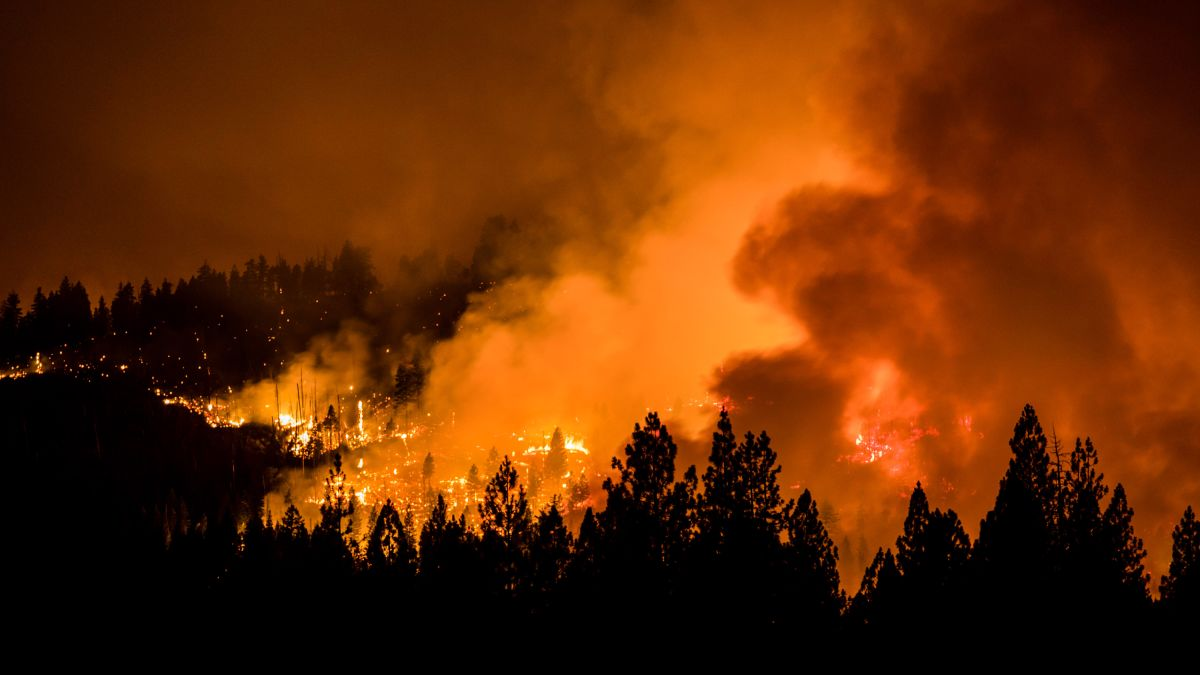

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import missingno as msno

In [ ]:
df = pd.read_csv('/kaggle/input/278k-us-wildfires-due-to-lightning-2004-2015/US_Lightning_Forest_Fires.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
(df.isna().sum()/len(df))*100

In [ ]:
msno.bar(df, figsize=(18,6),color='powderblue')

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='PuBuGn')

**As to size of wildfire:**

**Class A** - one-fourth acre or less;

**Class B** - more than one-fourth acre, but less than 10 acres;

**Class C** - 10 acres or more, but less than 100 acres;

**Class D** - 100 acres or more, but less than 300 acres;

**Class E** - 300 acres or more, but less than 1,000 acres;

**Class F** - 1,000 acres or more, but less than 5,000 acres;

**Class G** - 5,000 acres or more.

In [ ]:
df1 =(df.groupby('FIRE_YEAR')['FIRE_SIZE'].agg(['mean']).reset_index())
df2 = df.groupby('FIRE_YEAR')['index'].count().reset_index()

In [ ]:
fig = (
        px.scatter(df2,x='FIRE_YEAR', y='index',text='index',size_max=60))

fig.update_traces(textposition='top center')


fig.update_layout(margin = {'b':0,'l':0,'r':0,'t':100},
                  title_text='Total Fires Over The Years',
                  title_font_size=22,
                  paper_bgcolor='rgb(248, 248, 255)',
                  plot_bgcolor='rgb(248, 248, 255)',
                  title={'font':{
                             'family':'Courier New',
                             'size':22,
                             'color':'black'
                         },
                        'x':0.50,'y':0.9},
                 height=400)
fig.show()


In [ ]:
fig = (
        px.scatter(df1,x='FIRE_YEAR', y='mean',trendline='ols',trendline_color_override='red')
        .add_trace(px.line(df1,x='FIRE_YEAR',y='mean').data[0]))

fig.update_layout(margin = {'b':0,'l':0,'r':0,'t':100},
                  title_text='Avg. Fire Size Over The Years',
                  title_font_size=22,
                  paper_bgcolor='rgb(248, 248, 255)',
                  plot_bgcolor='rgb(248, 248, 255)',
                  title={'font':{
                             'family':'Courier New',
                             'size':22,
                             'color':'black'
                         },
                        'x':0.50,'y':0.9},
                 height=400)
fig.show()


In [ ]:
state_fire = (df.groupby('STATE')['FIRE_SIZE'].agg(['mean','min','idxmin','max','idxmax']).reset_index()
             .merge(df[['LATITUDE','LONGITUDE']],left_on='idxmin',right_index=True)
             .merge(df[['LATITUDE','LONGITUDE']],left_on='idxmax',right_index=True,suffixes=('_min','_max')))

fig = px.density_mapbox(state_fire, lat='LATITUDE_max', lon='LONGITUDE_max', z='mean', radius=10,
                        center = {"lat": 37.0902, "lon": -95.7129},zoom=3,
                        mapbox_style="stamen-terrain",
                        animation_frame='STATE',
                        height=700)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 800
fig.show()

In [ ]:
fire_class = df['FIRE_SIZE_CLASS'].value_counts()

fig = px.pie(values = fire_class,
             names = fire_class.index)

fig.update_traces(marker = dict(colors=px.colors.qualitative.Pastel2),
                 textinfo='percent+label',
                 showlegend=False,
                 insidetextorientation='radial')

fig.update_layout(margin = {'b':0,'l':0,'r':0,'t':100},
                  title_text='Fire Size Class',
                  title_font_size=22,
                  paper_bgcolor='rgb(248, 248, 255)',
                  plot_bgcolor='rgb(248, 248, 255)',
                  title={'font':{
                             'family':'Courier New',
                             'size':22,
                             'color':'black'
                         },
                        'x':0.50,'y':0.9})
fig.show()


In [ ]:
fig = px.histogram(df,x='FIRE_SIZE',
                  color='FIRE_SIZE_CLASS',
                  nbins=30,
                  width=1200,
                  barmode='overlay',
                  color_discrete_sequence=['lightgreen','lightyellow','lightblue','lightpink','plum','grey','papayawhip'],
                  log_y=True)

fig.update_layout(margin = {'b':0,'l':0,'r':0,'t':100},
                  title_text='Fire Size Class',
                  title_font_size=22,
                  paper_bgcolor='rgb(248, 248, 255)',
                  plot_bgcolor='rgb(248, 248, 255)',
                  title={'font':{
                             'family':'Courier New',
                             'size':22,
                             'color':'black'
                         },
                        'x':0.50,'y':0.9})

fig.show()

In [ ]:
grouped = df.groupby(['FIRE_YEAR','FIRE_SIZE_CLASS'])['FIRE_SIZE'].mean().reset_index()
grouped = pd.melt(frame = grouped, id_vars=['FIRE_YEAR','FIRE_SIZE_CLASS'],value_vars=['FIRE_SIZE'], value_name='Avg_Fire_Size')

In [ ]:
fig = px.bar(x=grouped['FIRE_YEAR'],
            y=grouped['Avg_Fire_Size'],
            color=grouped['FIRE_SIZE_CLASS'],
            barmode='group',
            width=1200)

fig.update_layout(margin = {'b':0,'l':0,'r':0,'t':100},
                  title_text='Fire Size Class Over The Years',
                  title_font_size=22,
                  paper_bgcolor='rgb(248, 248, 255)',
                  plot_bgcolor='rgb(248, 248, 255)',
                  title={'font':{
                             'family':'Courier New',
                             'size':22,
                             'color':'black'
                         },
                        'x':0.50,'y':0.9})

fig.show()

In [ ]:


fig = px.density_mapbox(df, lat='LATITUDE', lon='LONGITUDE', z='FIRE_SIZE', radius=10,
                        center = {"lat": 37.0902, "lon": -95.7129},zoom=3,
                        mapbox_style="stamen-terrain",
                        animation_frame='FIRE_YEAR',
                        height=700)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 800

fig.update_layout(margin = {'b':0,'l':0,'r':0,'t':100},
                  title_text='US Wildfires 1992-2015',
                  title_font_size=22,
                  paper_bgcolor='rgb(248, 248, 255)',
                  plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'Courier New',
                             'size':22,
                             'color':'black'
                         },
                        'x':0.50,'y':0.9},)

fig.show()


In [ ]:
fig = px.histogram(df,x='DISCOVERY_TIME',
                 nbins=10,
                 )

fig.update_traces(marker=dict(color='lightblue'))

fig.update_layout(margin = {'b':0,'l':0,'r':0,'t':100},
                  title_text='DISCOVERY_TIME',
                  title_font_size=22,
                  paper_bgcolor='rgb(248, 248, 255)',
                  plot_bgcolor='rgb(248, 248, 255)',
                  title={'font':{
                             'family':'Courier New',
                             'size':22,
                             'color':'black'
                         },
                        'x':0.50,'y':0.9},)
fig.show()

In [ ]:
fig = px.scatter(df,x='DISCOVERY_TIME',
                y='FIRE_SIZE',
                color='FIRE_SIZE_CLASS',
                symbol='FIRE_SIZE_CLASS',
                trendline='ols',
                trendline_color_override='red')

fig.update_traces(marker_size=7)
fig.update_layout(margin = {'b':0,'l':0,'r':0,'t':100},
                  title_text='Correlation Between Discovery Time & Fire Size.',
                  title_font_size=22,
                  paper_bgcolor='rgb(248, 248, 255)',
                  plot_bgcolor='rgb(248, 248, 255)',
                  title={'font':{
                             'family':'Courier New',
                             'size':22,
                             'color':'black'
                         },
                        'x':0.50,'y':0.9})
fig.show()

In [ ]:
fig = px.density_mapbox(df, lat='LATITUDE', lon='LONGITUDE', z='DISCOVERY_TIME', radius=10,
                        center = {"lat": 37.0902, "lon": -95.7129},zoom=3,
                        mapbox_style="stamen-terrain",
                        animation_frame='STATE',
                        height=700)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 800

fig.update_layout(margin = {'b':0,'l':0,'r':0,'t':100},
                  title_text='Discovery Time In Each State',
                  title_font_size=22,
                  paper_bgcolor='rgb(248, 248, 255)',
                  plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'Courier New',
                             'size':22,
                             'color':'black'
                         },
                        'x':0.50,'y':0.9},)

fig.show()


In [ ]:
fig = px.histogram(df,x='Days_to_extinguish_fire',
                 nbins=15,
                 log_y=True)

fig.update_traces(marker=dict(color='lightgreen'))

fig.update_layout(margin = {'b':0,'l':0,'r':0,'t':100},
                  title_text='Days To Extinguish Fire',
                  title_font_size=22,
                  paper_bgcolor='rgb(248, 248, 255)',
                  plot_bgcolor='rgb(248, 248, 255)',
                  title={'font':{
                             'family':'Courier New',
                             'size':22,
                             'color':'black'
                         },
                        'x':0.50,'y':0.9},)
fig.show()


In [ ]:
fig = px.scatter(df,x='Days_to_extinguish_fire',
                y='FIRE_SIZE',
                color='FIRE_SIZE_CLASS',
                trendline='ols',
                trendline_color_override='red',
                symbol='FIRE_SIZE_CLASS')

fig.update_traces(marker_size=8)

fig.update_layout(margin = {'b':0,'l':0,'r':0,'t':100},
                  title_text='Corelation Between Fire Size & Extinguish Fire',
                  title_font_size=22,
                  paper_bgcolor='rgb(248, 248, 255)',
                  plot_bgcolor='rgb(248, 248, 255)',
                  title={'font':{
                             'family':'Courier New',
                             'size':22,
                             'color':'black'
                         },
                        'x':0.50,'y':0.9},)
fig.show()

In [ ]:
fig = px.density_mapbox(df, lat='LATITUDE', lon='LONGITUDE', z='Days_to_extinguish_fire', radius=10,
                        center = {"lat": 37.0902, "lon": -95.7129},zoom=3,
                        mapbox_style="stamen-terrain",
                        animation_frame='STATE',
                        height=700)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 800

fig.update_layout(margin = {'b':0,'l':0,'r':0,'t':100},
                  title_text='Days to Extinguish Fire In Each Sate',
                  title_font_size=22,
                  paper_bgcolor='rgb(248, 248, 255)',
                  plot_bgcolor='rgb(248, 248, 255)',
                 title={'font':{
                             'family':'Courier New',
                             'size':22,
                             'color':'black'
                         },
                        'x':0.50,'y':0.9},)

fig.show()
